This code I ran in google collab because I was having issues with getting all the packages working properly

I was able to find this tutorial on tensorflow which shows you how to classify text with BERT.

https://www.tensorflow.org/text/tutorials/classify_text_with_bert

I then fit this example to my fake news dataset.

However, all of this code comes from the example. I just slightly modify it so it works with my example.

In [5]:
# Courtesy:
# https://www.tensorflow.org/text/tutorials/classify_text_with_bert

# Install required libraries
!pip install -U "tensorflow-text==2.13.*"
!pip install "tf-models-official==2.13.*"

  Using cached typing_extensions-4.5.0-py3-none-any.whl.metadata (8.5 kB)
Using cached typing_extensions-4.5.0-py3-none-any.whl (27 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.12.2
    Uninstalling typing_extensions-4.12.2:
      Successfully uninstalled typing_extensions-4.12.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-runtime-cu12==12.

In [6]:
# Was having an issue importing spacy to colab

# https://github.com/googlecolab/colabtools/issues/612
import spacy.cli
spacy.cli.download("en_core_web_lg")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [7]:
# Import Spacy and pandas
import spacy
import pandas as pd

# Load the spaCy model
nlp = spacy.load('en_core_web_lg')

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [33]:
# https://www.tensorflow.org/text/tutorials/classify_text_with_bert
# These imports are straight out of the above no changes
import os
import shutil

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optimizer

import matplotlib.pyplot as plt

In [35]:
# https://www.tensorflow.org/text/tutorials/classify_text_with_bert
# Straight out of the above

tf.get_logger().setLevel('ERROR')

In [ ]:
#Load the first 5000 records in the fake news dataset 
data = pd.read_csv('fake_news_small.csv', header = 0)

In [10]:
data.head()

,text,label
0,No comment is expected from Barack Obama Membe...,1
1,Did they post their votes for Hillary already?,1
2,"Now, most of the demonstrators gathered last ...",1
3,A dozen politically active pastors came here f...,0
4,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [11]:
# Build filesystem
# test and train folders
# 0 and 1
# https://www.geeksforgeeks.org/create-a-directory-in-python/
import os

In [12]:
# https://www.geeksforgeeks.org/create-a-directory-in-python/
os.mkdir('/content/train/')

In [13]:
# https://www.geeksforgeeks.org/create-a-directory-in-python/
os.mkdir('/content/train/0')

In [14]:
# https://www.geeksforgeeks.org/create-a-directory-in-python/
os.mkdir('/content/train/1')

In [15]:
# https://www.geeksforgeeks.org/create-a-directory-in-python/
os.mkdir('/content/test/')

In [16]:
# https://www.geeksforgeeks.org/create-a-directory-in-python/
os.mkdir('/content/test/0')

In [17]:
# https://www.geeksforgeeks.org/create-a-directory-in-python/
os.mkdir('/content/test/1')

In [20]:
# Move the first 4000 text's that are label 0 to folder train/0
# move the labe 1 to folder train/1
# Save the text of the news article in a text file
import shutil

for i in range(len(data[:4000])):
  #print(data.iloc[i][1])

  # Info about writing string to .txt
  # https://stackoverflow.com/questions/5214578/print-string-to-text-file
  with open(str(i)+".txt", "w") as text_file:
    text_file.write(str(data.iloc[i][0]))

  # Info about moving file
  # https://stackoverflow.com/questions/8858008/how-do-i-move-a-file-in-python
  if (data.iloc[i][1] == 0):
    shutil.move("/content/" + str(i) + ".txt", "/content/train/0/" + str(i)+ ".txt")

  else:
    shutil.move("/content/" + str(i) + ".txt", "/content/train/1/" + str(i)+ ".txt")

<ipython-input-20-1e7c395d92dc>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  text_file.write(str(data.iloc[i][0]))
<ipython-input-20-1e7c395d92dc>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (data.iloc[i][1] == 0):


In [21]:
# Similar to above expect for the test data

for i in range(len(data[4000:])):
  #print(data.iloc[i][1])

  # Info about writing string to .txt
  # https://stackoverflow.com/questions/5214578/print-string-to-text-file
  with open(str(i)+".txt", "w") as text_file:
    text_file.write(str(data.iloc[i][0]))

  # Info about moving file
  # https://stackoverflow.com/questions/8858008/how-do-i-move-a-file-in-python
  if (data.iloc[i][1] == 0):
    shutil.move("/content/" + str(i) + ".txt", "/content/test/0/" + str(i)+ ".txt")

  else:
    shutil.move("/content/" + str(i) + ".txt", "/content/test/1/" + str(i)+ ".txt")

<ipython-input-21-90183a7e4871>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  text_file.write(str(data.iloc[i][0]))
<ipython-input-21-90183a7e4871>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (data.iloc[i][1] == 0):


In [22]:
# https://www.tensorflow.org/text/tutorials/classify_text_with_bert
# Straight out of the above

AUTOTUNE = tf.data.AUTOTUNE
batch_size = 32
seed = 42

In [23]:
# https://www.tensorflow.org/text/tutorials/classify_text_with_bert
# Straight out of the above

# Load the training dataset of 3200 news articles
raw_train_ds = tf.keras.utils.text_dataset_from_directory(
    '/content/train',
    batch_size=batch_size,
    validation_split=0.2,
    subset='training',
    seed=seed)

Found 4000 files belonging to 2 classes.
Using 3200 files for training.


In [24]:
# Check the labels are correct
raw_train_ds.class_names

['0', '1']

In [25]:
# https://www.tensorflow.org/text/tutorials/classify_text_with_bert

class_names = raw_train_ds.class_names

In [26]:
# https://www.tensorflow.org/text/tutorials/classify_text_with_bert

train_ds = raw_train_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [27]:
# https://www.tensorflow.org/text/tutorials/classify_text_with_bert

# Load the validation dataset of 800 news articles
val_ds = tf.keras.utils.text_dataset_from_directory(
    '/content/train',
    batch_size=batch_size,
    validation_split=0.2,
    subset='validation',
    seed=seed)

Found 4000 files belonging to 2 classes.
Using 800 files for validation.


In [29]:
# https://www.tensorflow.org/text/tutorials/classify_text_with_bert

val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [30]:
# https://www.tensorflow.org/text/tutorials/classify_text_with_bert

# Load the test dataset
test_ds = tf.keras.utils.text_dataset_from_directory(
    '/content/test',
    batch_size=batch_size)

test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 1000 files belonging to 2 classes.


In [31]:
# https://www.tensorflow.org/text/tutorials/classify_text_with_bert

# Look at some examples
for text_batch, label_batch in train_ds.take(1):
  for i in range(3):
    print(f'Review: {text_batch.numpy()[i]}')
    label = label_batch.numpy()[i]
    print(f'Label : {label} ({class_names[label]})')

Review: b'JERUSALEM  \xe2\x80\x94   How short is a short skirt and who gets to decide? These were the questions vexing members of the Israeli Knesset, or Parliament, on Wednesday as dozens of female employees arrived in    attire to protest what they said was the Knesset guards\xe2\x80\x99 sudden eagerness to enforce a longstanding dress code. Many aides also wore thick tights or black leggings, though it was unclear if that was a nod to modesty or the bad weather. The   code, which a Knesset spokesman said was recently \xe2\x80\x9crefreshed,\xe2\x80\x9d calls for dignified dress that becomes the place and bans items like shorts, ripped trousers, skimpy tops,   with political slogans, short skirts and dresses, and  . While many Knesset members and their aides said they supported the need for a dress code, they questioned the guards\xe2\x80\x99 role as the arbiters of appropriate skirt length, comparing them to the modesty police in conservative religious societies. One employee cheekil

In [32]:
# https://www.tensorflow.org/text/tutorials/classify_text_with_bert

# Load a bert model
bert_model_name = 'small_bert/bert_en_uncased_L-4_H-512_A-8'

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


In [36]:
# https://www.tensorflow.org/text/tutorials/classify_text_with_bert

# Load the preprocessed BERT model
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

In [37]:
# https://www.tensorflow.org/text/tutorials/classify_text_with_bert

# Load the preprocessed BERT model
bert_model = hub.KerasLayer(tfhub_handle_encoder)

In [38]:
# https://www.tensorflow.org/text/tutorials/classify_text_with_bert

# Build a simple BERT model

def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(1, activation=None, name='classifier')(net)
  return tf.keras.Model(text_input, net)

In [40]:
# https://www.tensorflow.org/text/tutorials/classify_text_with_bert

text_test = ['this is such an amazing movie!']

In [41]:
# https://www.tensorflow.org/text/tutorials/classify_text_with_bert

# test it works
classifier_model2 = build_classifier_model()
bert_raw_result = classifier_model(tf.constant(text_test))
print(tf.sigmoid(bert_raw_result))

tf.Tensor([[0.45901817]], shape=(1, 1), dtype=float32)


In [42]:
# https://www.tensorflow.org/text/tutorials/classify_text_with_bert

# Define loss function and metrics
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
metrics = tf.metrics.BinaryAccuracy()

First run with 5 epochs and lr 3e-5

In [43]:
# https://www.tensorflow.org/text/tutorials/classify_text_with_bert

# Define number of epochs, learning rates, and some other stuff
epochs = 5
steps_per_epoch = tf.data.experimental.cardinality(train_ds).numpy()
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [44]:
# https://www.tensorflow.org/text/tutorials/classify_text_with_bert

classifier_model.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)

In [45]:
# https://www.tensorflow.org/text/tutorials/classify_text_with_bert

print(f'Training model with {tfhub_handle_encoder}')
history = classifier_model.fit(x=train_ds,
                               validation_data=val_ds,
                               epochs=epochs)

Training model with https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Epoch 1/5
100/100 [==============================] - 684s 7s/step - loss: 0.3606 - binary_accuracy: 0.8109 - val_loss: 0.1250 - val_binary_accuracy: 0.9400
Epoch 2/5
100/100 [==============================] - 647s 6s/step - loss: 0.1027 - binary_accuracy: 0.9609 - val_loss: 0.0803 - val_binary_accuracy: 0.9638
Epoch 3/5
100/100 [==============================] - 633s 6s/step - loss: 0.0595 - binary_accuracy: 0.9794 - val_loss: 0.0754 - val_binary_accuracy: 0.9712
Epoch 4/5
100/100 [==============================] - 645s 6s/step - loss: 0.0320 - binary_accuracy: 0.9884 - val_loss: 0.0782 - val_binary_accuracy: 0.9750
Epoch 5/5
100/100 [==============================] - 646s 6s/step - loss: 0.0208 - binary_accuracy: 0.9944 - val_loss: 0.1079 - val_binary_accuracy: 0.9625


In [46]:
# https://www.tensorflow.org/text/tutorials/classify_text_with_bert

loss, accuracy = classifier_model.evaluate(test_ds)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

32/32 [==============================] - 78s 2s/step - loss: 0.0341 - binary_accuracy: 0.9890
Loss: 0.03410305455327034
Accuracy: 0.9890000224113464


dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


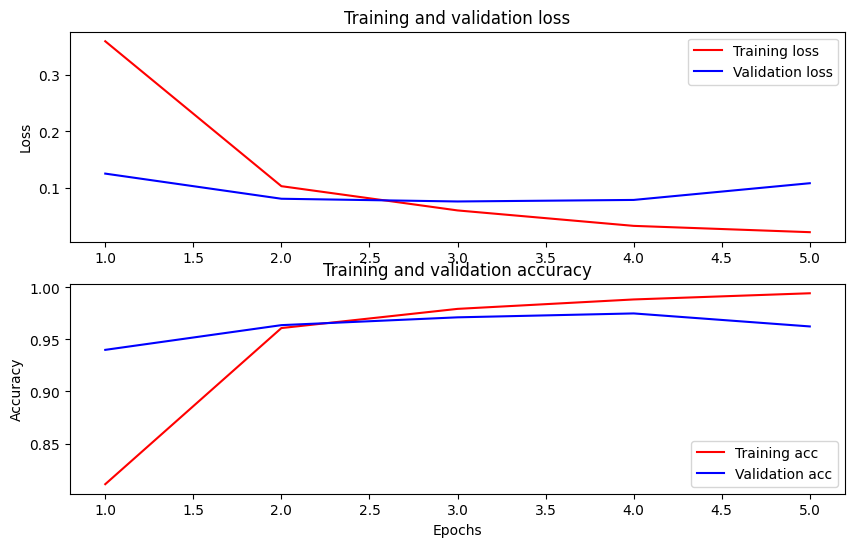

In [47]:
# https://www.tensorflow.org/text/tutorials/classify_text_with_bert

history_dict = history.history
print(history_dict.keys())

acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
# r is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

Second run with 5 epochs and learning rate 3e-6

In [62]:
classifier_model2 = build_classifier_model()

In [63]:
# https://www.tensorflow.org/text/tutorials/classify_text_with_bert

# Define loss function and metrics
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
metrics = tf.metrics.BinaryAccuracy()

In [64]:
# https://www.tensorflow.org/text/tutorials/classify_text_with_bert

# Define number of epochs, learning rates, and some other stuff
epochs = 5
steps_per_epoch = tf.data.experimental.cardinality(train_ds).numpy()
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-6
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [66]:
# https://www.tensorflow.org/text/tutorials/classify_text_with_bert

classifier_model2.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)

In [67]:
# https://www.tensorflow.org/text/tutorials/classify_text_with_bert

print(f'Training model with {tfhub_handle_encoder}')
history = classifier_model2.fit(x=train_ds,
                               validation_data=val_ds,
                               epochs=epochs)

Training model with https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Epoch 1/5
100/100 [==============================] - 663s 7s/step - loss: 0.6797 - binary_accuracy: 0.5719 - val_loss: 0.5006 - val_binary_accuracy: 0.7025
Epoch 2/5
100/100 [==============================] - 655s 7s/step - loss: 0.4345 - binary_accuracy: 0.7794 - val_loss: 0.3277 - val_binary_accuracy: 0.8263
Epoch 3/5
100/100 [==============================] - 666s 7s/step - loss: 0.3191 - binary_accuracy: 0.8575 - val_loss: 0.2661 - val_binary_accuracy: 0.8813
Epoch 4/5
100/100 [==============================] - 692s 7s/step - loss: 0.2806 - binary_accuracy: 0.8897 - val_loss: 0.2429 - val_binary_accuracy: 0.8750
Epoch 5/5
100/100 [==============================] - 666s 7s/step - loss: 0.2546 - binary_accuracy: 0.8994 - val_loss: 0.2372 - val_binary_accuracy: 0.8750


In [68]:
# https://www.tensorflow.org/text/tutorials/classify_text_with_bert

loss, accuracy = classifier_model2.evaluate(test_ds)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

32/32 [==============================] - 45s 1s/step - loss: 0.2258 - binary_accuracy: 0.9060
Loss: 0.22577373683452606
Accuracy: 0.906000018119812


dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


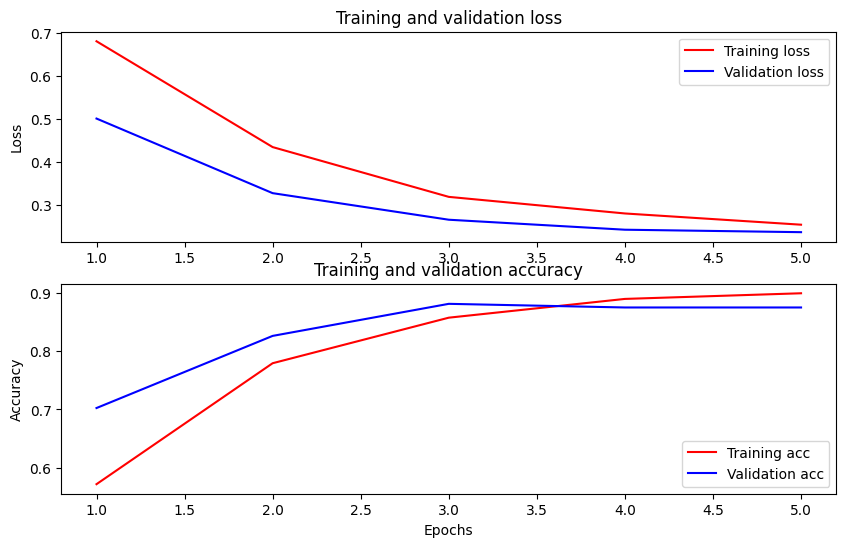

In [69]:
# https://www.tensorflow.org/text/tutorials/classify_text_with_bert

history_dict = history.history
print(history_dict.keys())

acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
# r is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

Third run with 3 epochs and learning rate 3e-6

In [70]:
classifier_model3 = build_classifier_model()

In [71]:
# https://www.tensorflow.org/text/tutorials/classify_text_with_bert

# Define loss function and metrics
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
metrics = tf.metrics.BinaryAccuracy()

In [72]:
# https://www.tensorflow.org/text/tutorials/classify_text_with_bert

# Define number of epochs, learning rates, and some other stuff
epochs = 3
steps_per_epoch = tf.data.experimental.cardinality(train_ds).numpy()
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-6
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [73]:
# https://www.tensorflow.org/text/tutorials/classify_text_with_bert

classifier_model3.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)

In [74]:
# https://www.tensorflow.org/text/tutorials/classify_text_with_bert

print(f'Training model with {tfhub_handle_encoder}')
history = classifier_model3.fit(x=train_ds,
                               validation_data=val_ds,
                               epochs=epochs)

Training model with https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Epoch 1/3
100/100 [==============================] - 657s 7s/step - loss: 0.5976 - binary_accuracy: 0.6400 - val_loss: 0.4790 - val_binary_accuracy: 0.7450
Epoch 2/3
100/100 [==============================] - 641s 6s/step - loss: 0.4481 - binary_accuracy: 0.7837 - val_loss: 0.4017 - val_binary_accuracy: 0.7962
Epoch 3/3
100/100 [==============================] - 682s 7s/step - loss: 0.3989 - binary_accuracy: 0.8213 - val_loss: 0.3783 - val_binary_accuracy: 0.8075


In [75]:
# https://www.tensorflow.org/text/tutorials/classify_text_with_bert

loss, accuracy = classifier_model3.evaluate(test_ds)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

32/32 [==============================] - 45s 1s/step - loss: 0.3470 - binary_accuracy: 0.8330
Loss: 0.3469584286212921
Accuracy: 0.8330000042915344


dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


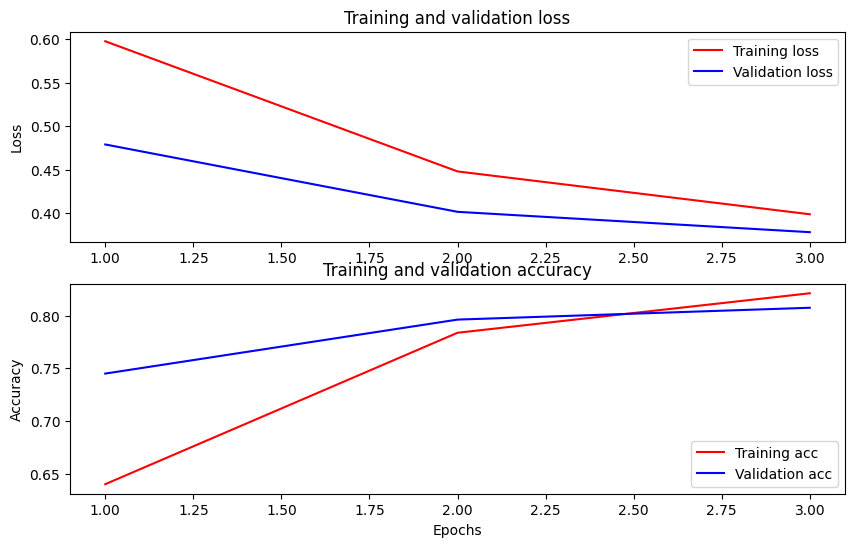

In [76]:
# https://www.tensorflow.org/text/tutorials/classify_text_with_bert

history_dict = history.history
print(history_dict.keys())

acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
# r is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

Fourth run with 3 epochs and learning rate 3e-5

In [77]:
classifier_model4 = build_classifier_model()

In [78]:
# https://www.tensorflow.org/text/tutorials/classify_text_with_bert

# Define loss function and metrics
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
metrics = tf.metrics.BinaryAccuracy()

In [79]:
# https://www.tensorflow.org/text/tutorials/classify_text_with_bert

# Define number of epochs, learning rates, and some other stuff
epochs = 3
steps_per_epoch = tf.data.experimental.cardinality(train_ds).numpy()
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [80]:
# https://www.tensorflow.org/text/tutorials/classify_text_with_bert

classifier_model4.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)

In [81]:
# https://www.tensorflow.org/text/tutorials/classify_text_with_bert

print(f'Training model with {tfhub_handle_encoder}')
history = classifier_model4.fit(x=train_ds,
                               validation_data=val_ds,
                               epochs=epochs)

Training model with https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Epoch 1/3
100/100 [==============================] - 646s 6s/step - loss: 0.3471 - binary_accuracy: 0.8250 - val_loss: 0.1077 - val_binary_accuracy: 0.9463
Epoch 2/3
100/100 [==============================] - 639s 6s/step - loss: 0.1057 - binary_accuracy: 0.9628 - val_loss: 0.0826 - val_binary_accuracy: 0.9663
Epoch 3/3
100/100 [==============================] - 659s 7s/step - loss: 0.0601 - binary_accuracy: 0.9762 - val_loss: 0.0856 - val_binary_accuracy: 0.9650


In [82]:
# https://www.tensorflow.org/text/tutorials/classify_text_with_bert

loss, accuracy = classifier_model4.evaluate(test_ds)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

32/32 [==============================] - 44s 1s/step - loss: 0.0481 - binary_accuracy: 0.9780
Loss: 0.04814815893769264
Accuracy: 0.9779999852180481


dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


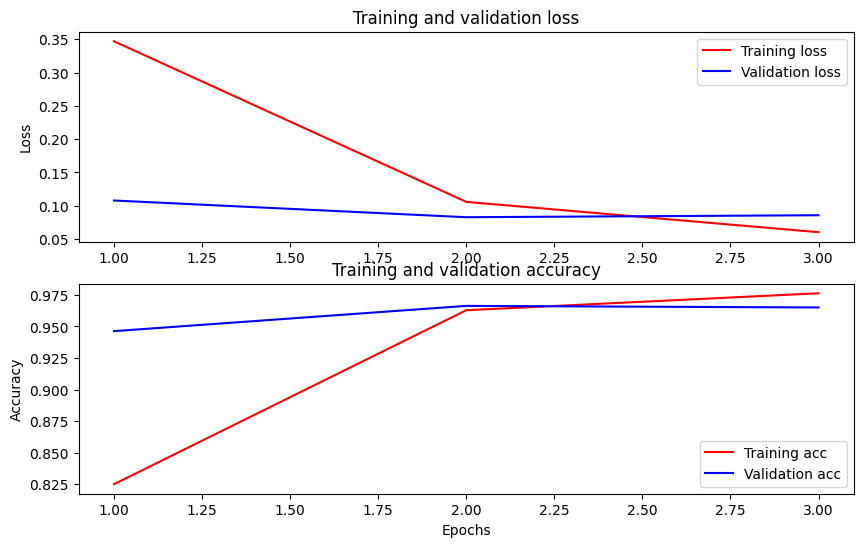

In [83]:
# https://www.tensorflow.org/text/tutorials/classify_text_with_bert

history_dict = history.history
print(history_dict.keys())

acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
# r is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')